In [1]:
import numpy as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trd = pd.read_csv('data/train.csv')
tsd = pd.read_csv('data/test.csv')
td = pd.concat([trd, tsd], ignore_index=True, sort  = False)

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

*Models*

<ol>
<li><code>LogisticRegression</code></li>
<li><code>KNeighborsClassifier</code></li>
<li><code>SVC</code></li>
<li><code>DecisionTreeClassifier</code></li>
<li><code>RandomForestClassifier</code></li>
<li><code>GaussianNB</code></li>
<li><code>GradientBoostingClassifier</code></li>
<li><code>XGBClassifier</code></li>
<li><code>BaggingClassifier</code></li>
<li><code>AdaBoostClassifier</code></li>
<li><code>ExtraTreesClassifier</code></li>
</ol>

In [3]:
tsd.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
td.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
td.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [7]:
td['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

### `Missing Values`

In [8]:
td.shape[0]

1309

In [9]:
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

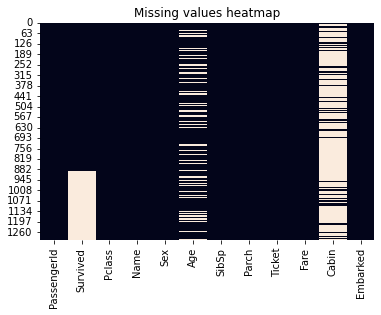

In [10]:
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

### `Survived`



- more than 60 percent people died
- Female's probability more to survived than male
- probability of 1st Pclass peolple is more than other 2 classes
- People have cabin having more probability to survive

In [11]:
trd[trd['Survived']==0].shape[0]/trd.shape[0]

0.6161616161616161

<AxesSubplot:xlabel='Survived', ylabel='count'>

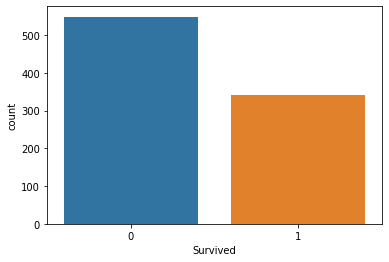

In [12]:
sns.countplot(x='Survived', data=trd)

<AxesSubplot:xlabel='Survived', ylabel='count'>

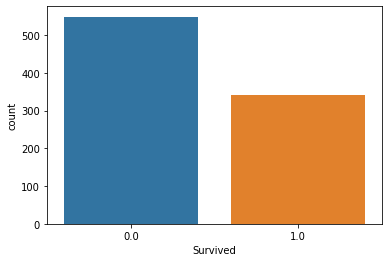

In [13]:
sns.countplot(x='Survived', data=td)

### `Pclass`

- probability of 1st Pclass peolple is more than other 2 classes
- No. of people(491) in 3rd class is more than total people(400) in 1st and 2nd both classes

In [14]:
trd['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
216+184

400

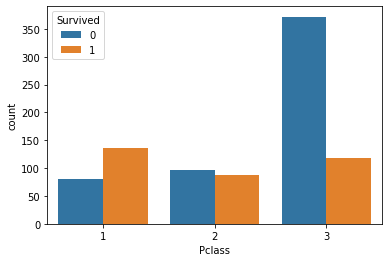

In [163]:
sns.countplot(hue='Survived', data=trd, x='Pclass');

### `Sex`

- Female probability  is more to survived than male
- 35 percent were only females and 65% were males
- probability for survived people is 39 percent and in which 26 percent were females and 12 percent were males only


<AxesSubplot:xlabel='Survived', ylabel='count'>

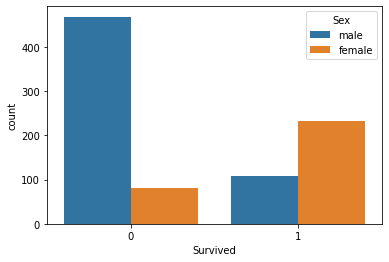

In [17]:
sns.countplot(x='Survived', data=trd, hue='Sex')

In [18]:
trd['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
314/891

0.35241301907968575

In [20]:
trd[(trd['Sex']=='female') & (trd['Survived']==1)].shape[0]/trd.shape[0]

0.2615039281705948

In [21]:
trd[(trd['Sex']=='male') & (trd['Survived']==1)].shape[0]/trd.shape[0]

0.122334455667789

### `Age`

- Average value of age of people is 29.69
- Average value of age of female  is 27.91
- Average value of age of female  is 30.72
- Group A have 50 % chances for survival
- Group B have only 38 % chances for survival
- Group C have only 36 % chances for survival
- A larger fraction of children under 10 survived than died.
- Every other age group, the number of casualties was higher than the number of survivors

In [22]:
trd['Age'].mean()

29.69911764705882

In [23]:
trd[trd['Sex']=='female']['Age'].mean()

27.915708812260537

In [24]:
trd[trd['Sex']=='male']['Age'].mean()

30.72664459161148

Binning

In [25]:
from sklearn.preprocessing import Binarizer

In [26]:
td['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [27]:
trd.loc[trd['Age'].between(0, 18, 'both'), 'Age Group'] = 'A'
trd.loc[trd['Age'].between(18, 40, 'right'), 'Age Group'] = 'B'
trd.loc[trd['Age'].between(40, 81, 'right'), 'Age Group'] = 'C'

In [28]:
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,B
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,B
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,B


In [29]:
trd[trd['Age Group']=='A'].shape[0]

139

In [30]:
trd[(trd['Age Group']=='A') & (trd['Survived']==1)].shape[0]
70/139

0.5035971223021583

In [31]:
trd[trd['Age Group']=='B'].shape[0]


425

In [32]:
trd[(trd['Age Group']=='B') & (trd['Survived']==1)].shape[0]
165/425

0.38823529411764707

In [33]:
trd[trd['Age Group']=='C'].shape[0]

150

In [34]:
trd[(trd['Age Group']=='C') & (trd['Survived']==1)].shape[0]
55/150

0.36666666666666664

<AxesSubplot:xlabel='Age Group', ylabel='count'>

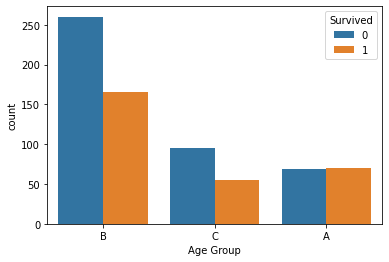

In [35]:
sns.countplot(hue='Survived', data=trd, x='Age Group')

In [36]:
trd.loc[trd['Age'].between(0, 10, 'right'), 'Age Range'] = '(0-10]'
trd.loc[trd['Age'].between(10, 20, 'right'), 'Age Range'] = '(10-20]'
trd.loc[trd['Age'].between(20, 30, 'right'), 'Age Range'] = '(20-30]'
trd.loc[trd['Age'].between(30, 40, 'right'), 'Age Range'] = '(30-40]'
trd.loc[trd['Age'].between(40, 50, 'right'), 'Age Range'] = '(40-50]'
trd.loc[trd['Age'].between(50, 60, 'right'), 'Age Range'] = '(50-60]'
trd.loc[trd['Age'].between(60, 70, 'right'), 'Age Range'] = '(60-70]'
trd.loc[trd['Age'].between(70, 80, 'right'), 'Age Range'] =  '(70-80]'

<AxesSubplot:xlabel='Age Range', ylabel='count'>

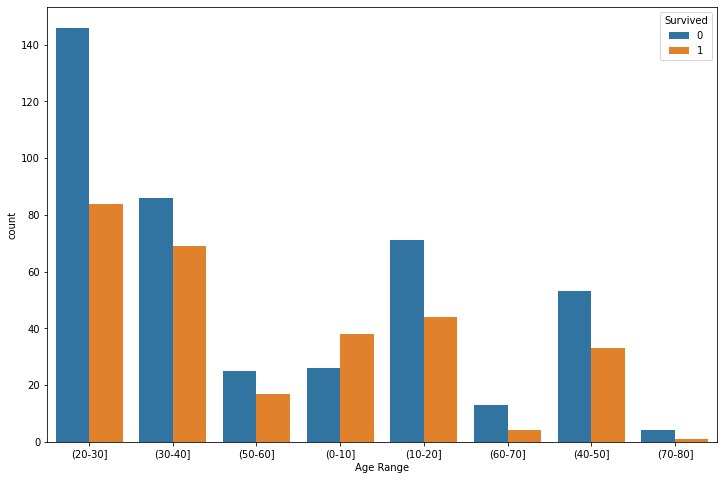

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age Range', data=trd, hue='Survived')

### `Sibsp`

- More than 90% of people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

In [38]:
td['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [39]:
trd.loc[trd['SibSp'].between(0, 1, 'left'), 'SibSp Range'] = '[0-1)'
trd.loc[trd['SibSp'].between(1,2, 'left'), 'SibSp Range'] = '[1-2)'
trd.loc[trd['SibSp'].between(2,3, 'left'), 'SibSp Range'] = '[2-3)'
trd.loc[trd['SibSp'].between(3,4, 'left'), 'SibSp Range'] = '[3-4)'
trd.loc[trd['SibSp'].between(4,5, 'left'), 'SibSp Range'] = '[4-5)'
trd.loc[trd['SibSp'].between(5,6, 'left'), 'SibSp Range'] = '[5-6)'

<AxesSubplot:xlabel='SibSp Range', ylabel='count'>

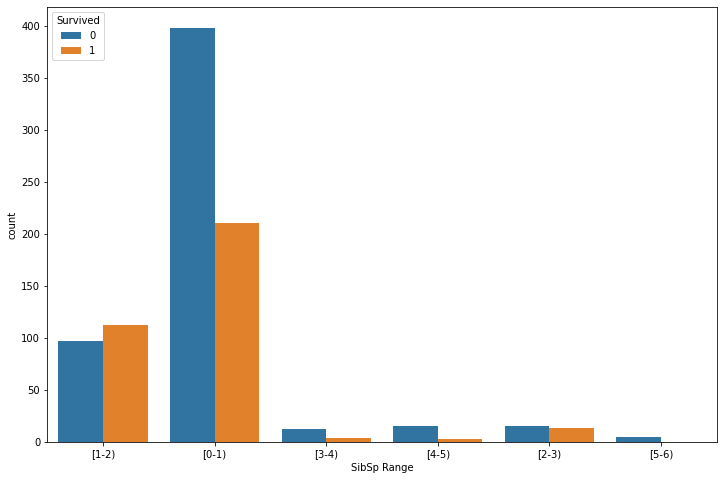

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='SibSp Range', data=trd, hue='Survived')

### `Parch`

In [41]:
td['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

In [42]:
trd.loc[trd['Parch'].between(0, 1, 'left'), 'Parch Range'] = '[0-1)'
trd.loc[trd['Parch'].between(1,2, 'left'), 'Parch Range'] = '[1-2)'
trd.loc[trd['Parch'].between(2,3, 'left'), 'Parch Range'] = '[2-3)'
trd.loc[trd['Parch'].between(3,4, 'left'), 'Parch Range'] = '[3-4)'
trd.loc[trd['Parch'].between(4,5, 'left'), 'Parch Range'] = '[4-5)'
trd.loc[trd['Parch'].between(5,6, 'left'), 'Parch Range'] = '[5-6)'
trd.loc[trd['Parch'].between(6,7 ,'left'), 'Parch Range'] = '[6-7)'
trd.loc[trd['Parch'].between(7,8, 'left'), 'Parch Range'] = '[7-8)'
trd.loc[trd['Parch'].between(8,9, 'left'), 'Parch Range'] = '[8-9)'
trd.loc[trd['Parch'].between(9,10, 'left'), 'Parch Range'] = '[9-10)'


Not necessary to write above code we can plot same code without binning see in family diagram

<AxesSubplot:xlabel='Parch Range', ylabel='count'>

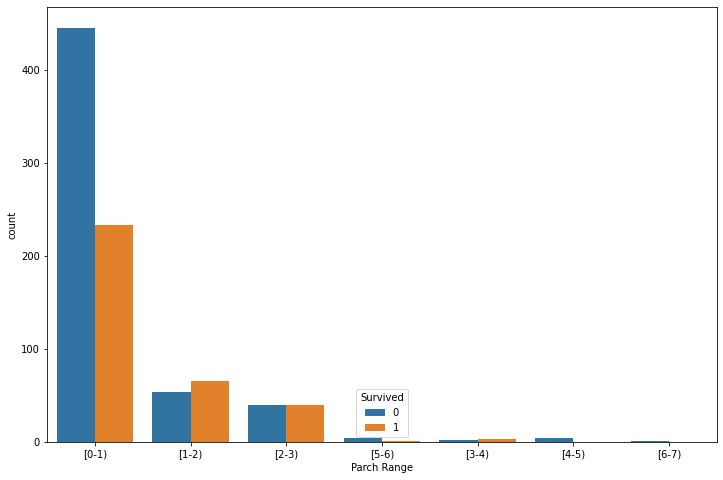

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='Parch Range', data=trd, hue='Survived')

### `Family`

-  the number of ‘Parch’ and ‘SibSp’ values to store in a new column named ‘Family’
-  the chances of survival skyrocketed when a traveler traveled alone. Created another column, Is_Alone and assigned True if the value in ‘Family’ column was 0.

In [44]:
td['Family'] = td.Parch + td.SibSp

In [45]:
td["Family"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family, dtype: int64

In [46]:
td.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
1200,1201,NaN,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S,1
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0
760,761,0.0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S,0
623,624,0.0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S,0
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0
756,757,0.0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S,0
950,951,NaN,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,0
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,1
365,366,0.0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S,0
417,418,1.0,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,2


In [47]:
td['Is_Alone'] = td.Family == 0

In [48]:
td[td['Is_Alone']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Is_Alone
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,True
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,True
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0,True
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,True
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,True
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,True


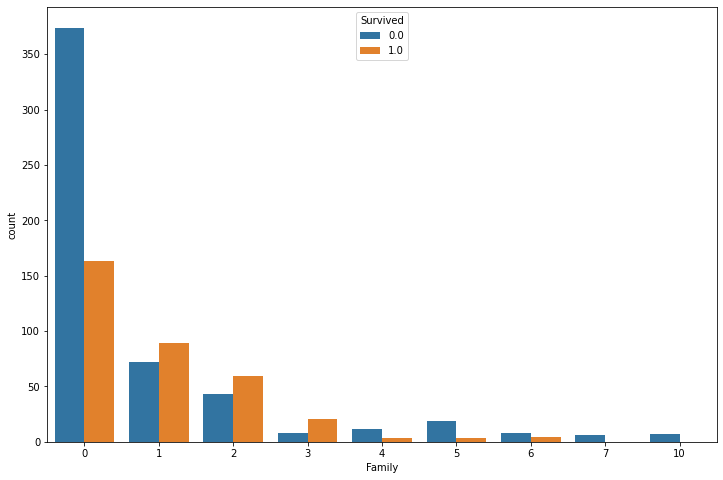

In [166]:
plt.figure(figsize=(12,8))
sns.countplot(x='Family', data=td, hue='Survived');

### `Fare`

- 1 missing value in Fare column in test data. we can impute value of fare with mean of the column.
- The higher a tourist paid, the higher would be his chances to survive.

In [49]:
td['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [50]:
td[(td['Fare']>31)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Is_Alone
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,True
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,6,False
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C,1,False
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,0,True
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,2,False
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,False


In [51]:
tsd.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [167]:
td.loc[td['Fare'].between(0,  7.895800, 'left'), 'Fare Category'] = 'Low'
td.loc[td['Fare'].between( 7.895800,14.454200, 'left'), 'Fare Category'] = 'Mid'
td.loc[td['Fare'].between(14.454200,31.275000, 'left'), 'Fare Category'] = 'High_Mid'
td.loc[td['Fare'].between(31.275000,513, 'left'), 'Fare Category'] = 'High'

In [53]:
# td['Fare Category'] = pd.cut(td['Fare'],
#                                          bins=[0,7.90,14.45,31.28,120], 
#                                          labels=['Low','Mid','High_Mid','High'])

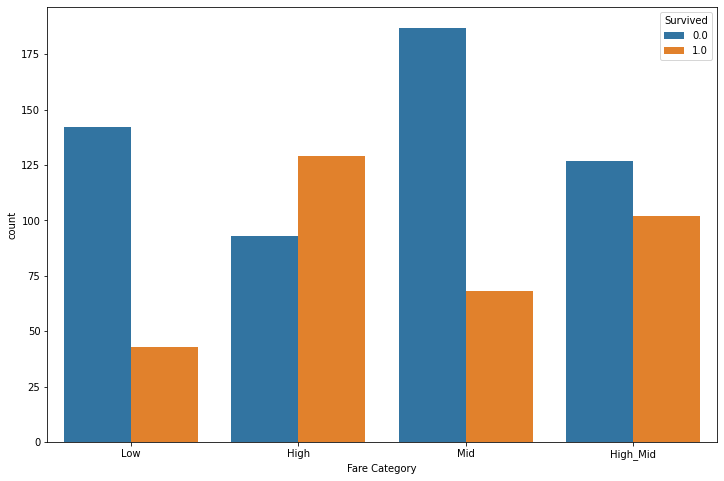

In [169]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fare Category', data=td, hue='Survived');

In [55]:
td[(td['Fare Category']=='High')]['Cabin'].isnull().sum()

124

### `Embarked`

- Two missing values in Embarked column in test data. we can impute value of Embarked with most frequent value(mode) of the column.
-  There are three possible values for Embark — Southampton, Cherbourg, and Queenstown
- More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown
- People who boarded from Cherbourg had a higher chance of survival 

In [171]:
td['Embarked'].isna().sum()

2

In [170]:
td['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [56]:
td['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

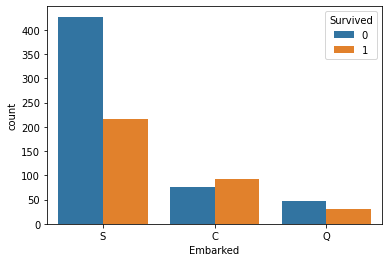

In [57]:
sns.countplot(x='Embarked', data=trd, hue='Survived')

### `Cabin`

- Out of 1309 rows, there are 1014 rows with missing Cabin values.
- 1st Pclass, out of 323, 67 people not have cabin,the probalility of survival of 1st class people is more than other 2 classes. so we see here people have cabin having more probability to survive.
- 2nd Pclass, out of 277, 254 people not have cabin 
- 3rd Pclass, out of 709, 693 people not have cabin 

In [58]:
td['Cabin'].isnull().sum()

1014

In [59]:
td['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [60]:
td[(td["Pclass"]==1 ) & (td['Cabin'].isnull())].shape[0]

67

In [61]:
td[(td["Pclass"]==2 ) & (td['Cabin'].isnull())].shape[0]

254

In [62]:
td[(td["Pclass"]==3 ) & (td['Cabin'].isnull())].shape[0]

693

In [101]:
td['Cabin'].unique()[1] 

'C85'

In [104]:
# td['Cabin'].str[0]

In [67]:

td['Cabin_num'] = td['Cabin'].str.extract('(\d+)') # captures numerical part
td['Cabin_cat'] = td['Cabin'].str[0] # captures the first letter

In [71]:
td['Cabin_num'].value_counts()

6      9
33     8
22     7
23     7
34     7
      ..
79     1
95     1
70     1
16     1
105    1
Name: Cabin_num, Length: 104, dtype: int64

In [70]:
td['Cabin_num'].unique()

array([nan, '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '28', '83', '73', '31', '5', '10', '26', '110', '58', '101',
       '69', '47', '86', '2', '19', '7', '49', '4', '32', '80', '36',
       '15', '93', '35', '87', '77', '67', '94', '125', '99', '118', '22',
       '106', '65', '54', '57', '34', '18', '124', '91', '40', '128',
       '37', '50', '82', '96', '44', '104', '111', '92', '38', '21', '12',
       '63', '14', '20', '79', '25', '95', '39', '70', '16', '68', '41',
       '9', '48', '126', '71', '51', '62', '24', '90', '45', '8', '121',
       '11', '3', '17', '102', '42', '148', '61', '53', '43', '130',
       '132', '55', '116', '29', '97', '89', '60', '105'], dtype=object)

In [74]:
td['Cabin_cat'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin_cat, dtype: int64

<AxesSubplot:>

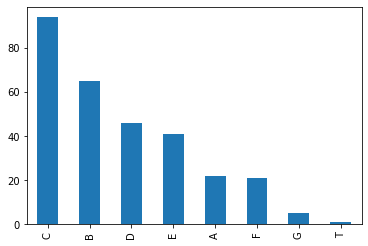

In [73]:
td['Cabin_cat'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

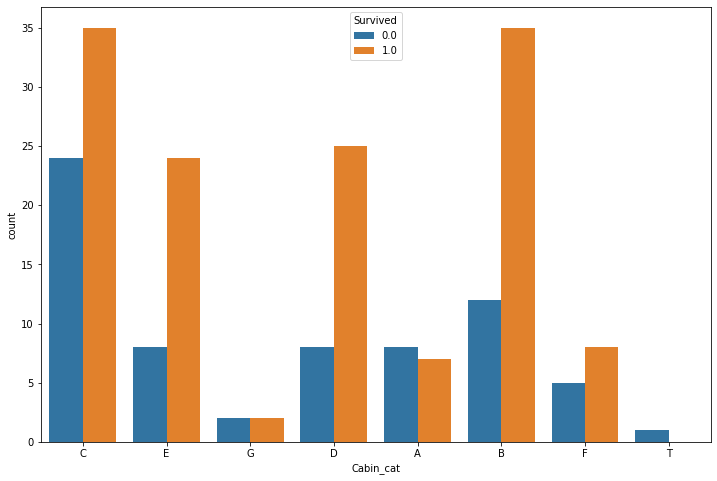

In [75]:
plt.figure(figsize=(12,8))
sns.countplot(x='Cabin_cat', data=td, hue='Survived')

### `PassengerId`

- Since PassengerId is a unique identifier for each passenger, we can drop it from the dataset.

In [161]:
# td['PassengerId']

### `Ticket`

In [63]:
td['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [78]:
# extract the last bit of ticket as number
td['Ticket_num'] = td['Ticket'].apply(lambda s: s.split()[-1])
td['Ticket_num'] = pd.to_numeric(td['Ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of Ticket as category
td['Ticket_cat'] = td['Ticket'].apply(lambda s: s.split()[0])
td['Ticket_cat'] = np.where(td['Ticket_cat'].str.isdigit(), np.nan,
                              td['Ticket_cat'])

In [82]:
td['Ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON', 'SC/A.3', 'STON/OQ.', 'SC/A4', 'AQ/4', 'A.', 'LP',
       'AQ/3.'], dtype=object)

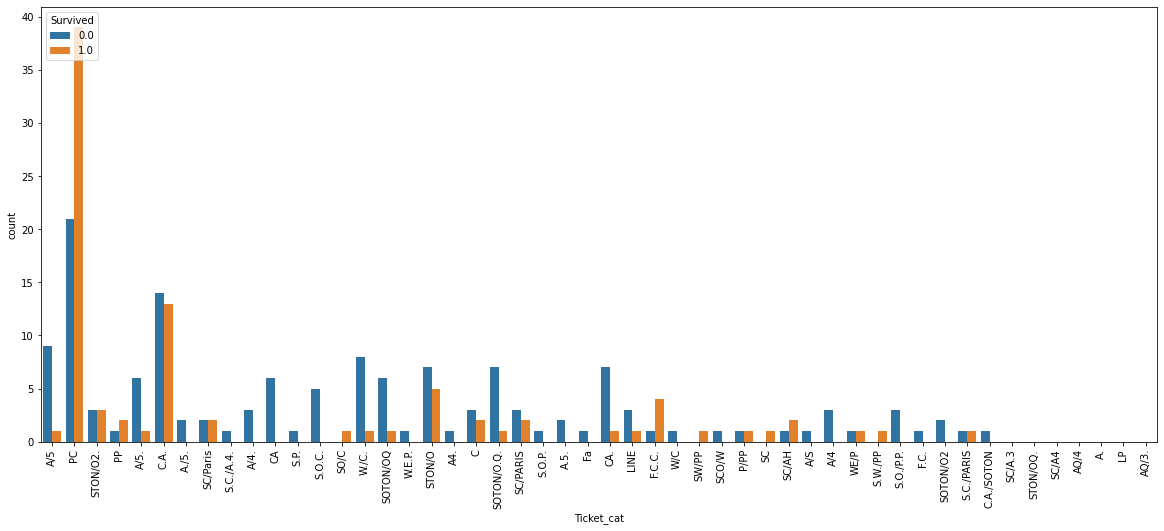

In [89]:

plt.figure(figsize=(20,8))
sns.countplot(data=td,x='Ticket_cat',hue='Survived')
plt.xticks(rotation = 90);

### `Name`

- Females have high probability to survived, But with Miss title females have more probability than Mrs. title

In [129]:
td['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [143]:
def collect(name):
    return name.split(',')[1].split(' ')[1]

In [150]:
td['Title']=td['Name'].apply(collect)

In [152]:
td.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family,Is_Alone,Fare Category,Cabin_num,Cabin_cat,ticket_num,ticket_cat,Ticket_num,Ticket_cat,Title
553,554,1.0,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,...,0,True,Low,NaN,NaN,2620.0,NaN,2620.0,NaN,Mr.
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,...,0,True,Low,NaN,NaN,334915.0,NaN,334915.0,NaN,Miss.
51,52,0.0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,...,0,True,Low,NaN,NaN,39886.0,A/4.,39886.0,A/4.,Mr.
1287,1288,NaN,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,...,0,True,Low,NaN,NaN,371109.0,NaN,371109.0,NaN,Mr.
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,...,0,True,Med,NaN,NaN,21440.0,NaN,21440.0,NaN,Mr.


<AxesSubplot:>

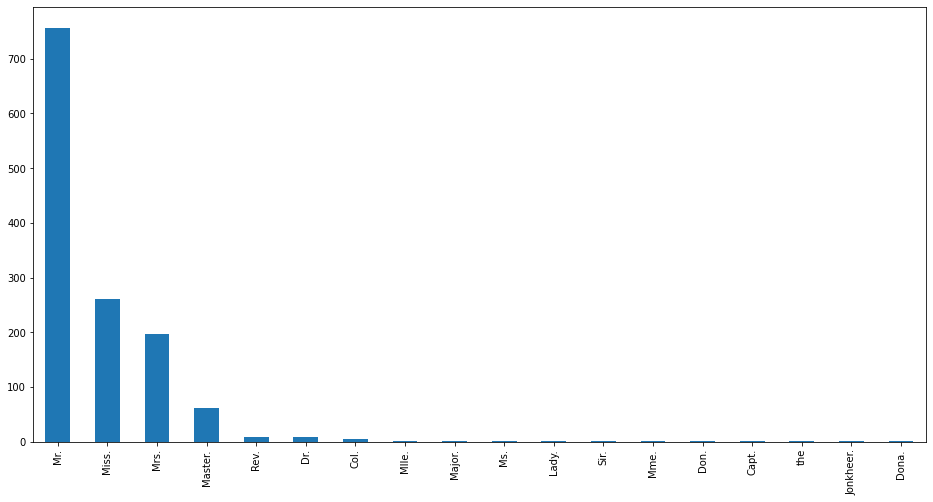

In [155]:
plt.figure(figsize=(16,8))
td['Title'].value_counts().plot(kind='bar')

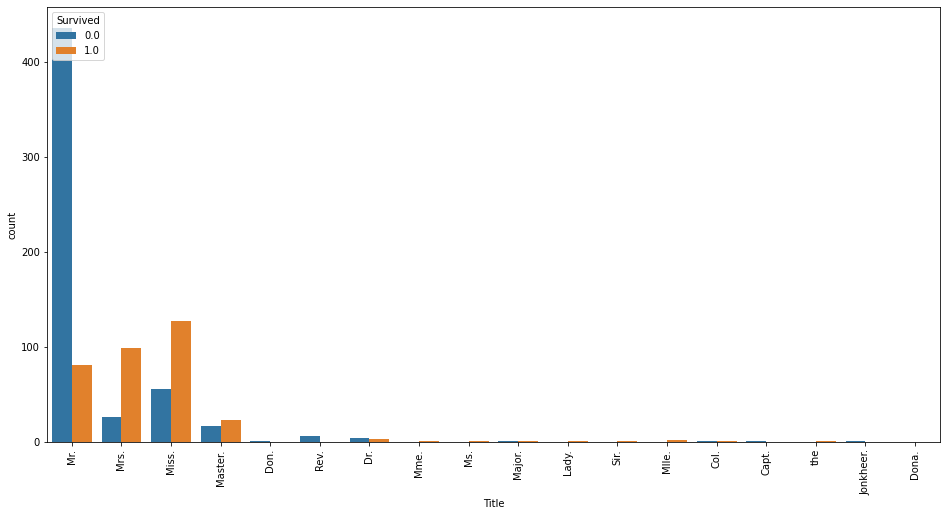

In [159]:
plt.figure(figsize=(16,8))
sns.countplot(data=td,x='Title',hue='Survived')
plt.xticks(rotation = 90)
plt.show()